In [2]:
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import os
if not os.path.exists('hists'):
    os.makedirs('hists')

In [3]:
filename = "/home/ryanm124/output_ttHTobb_2018.coffea"
o = load(filename)
print(o.keys())
o['variables'].keys()
print(o['variables'].keys())

dict_keys(['sum_genweights', 'sumw', 'cutflow', 'variables', 'columns', 'processing_metadata'])
dict_keys(['ElectronGood_eta_1', 'ElectronGood_pt_1', 'ElectronGood_phi_1', 'ElectronGood_etaSC_1', 'MuonGood_eta_1', 'MuonGood_pt_1', 'MuonGood_phi_1', 'nElectronGood', 'nMuonGood', 'nJets', 'nBJets', 'JetGood_eta_1', 'JetGood_pt_1', 'JetGood_phi_1', 'JetGood_btagDeepFlavB_1', 'JetGood_eta_2', 'JetGood_pt_2', 'JetGood_phi_2', 'JetGood_btagDeepFlavB_2', 'JetGood_eta_3', 'JetGood_pt_3', 'JetGood_phi_3', 'JetGood_btagDeepFlavB_3', 'JetGood_eta_4', 'JetGood_pt_4', 'JetGood_phi_4', 'JetGood_btagDeepFlavB_4', 'JetGood_eta_5', 'JetGood_pt_5', 'JetGood_phi_5', 'JetGood_btagDeepFlavB_5', 'bjet_eta_1', 'bjet_pt_1', 'bjet_phi_1', 'bjet_btagDeepFlavB_1', 'bjet_eta_2', 'bjet_pt_2', 'bjet_phi_2', 'bjet_btagDeepFlavB_2', 'bjet_eta_3', 'bjet_pt_3', 'bjet_phi_3', 'bjet_btagDeepFlavB_3', 'fatjet_eta', 'fatjet_pt', 'fatjet_phi', 'fatjet_mass', 'fatjet_msoftdrop', 'fatjet_tau1', 'fatjet_tau2', 'fatjet_tau3', '

In [35]:
o['variables']['nJets']['ttHTobb'].axes[-1].name

'events.nJetGood'

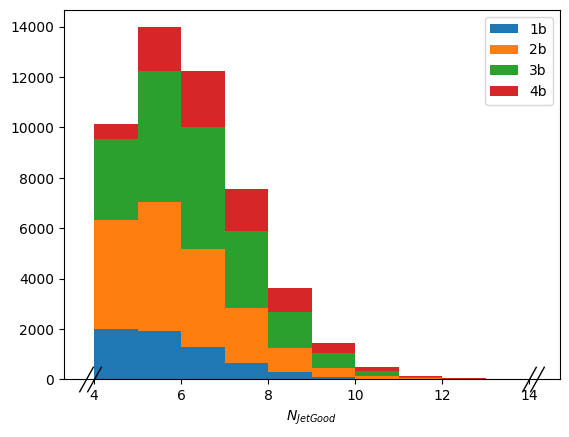

In [16]:
o['variables']['nJets']['ttHTobb'].stack("cat").project("events.nJetGood")[:-1].plot(stack=True,density=False,histtype="fill")
plt.legend()

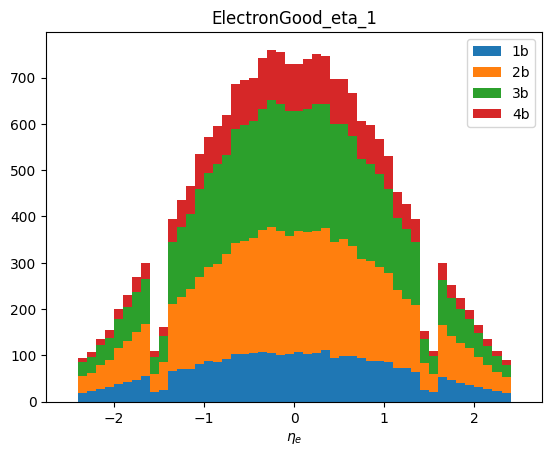

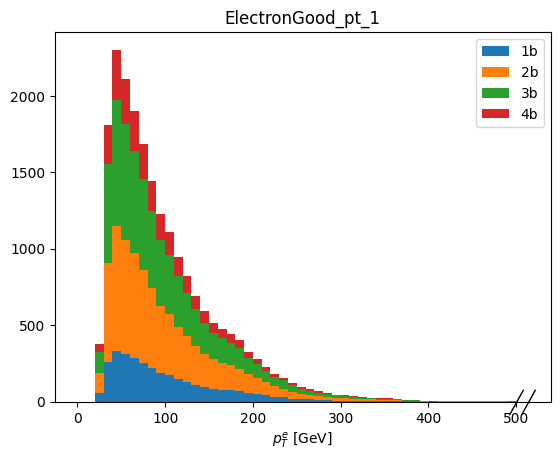

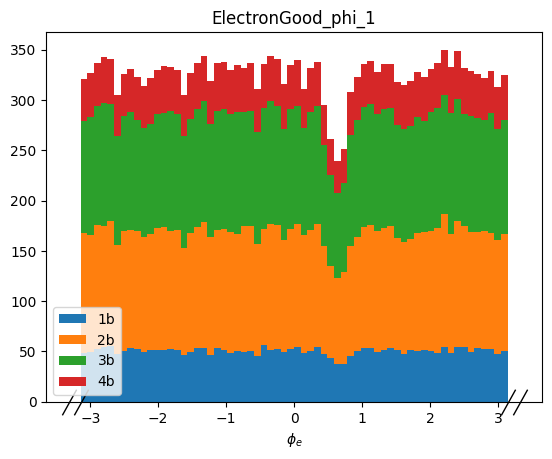

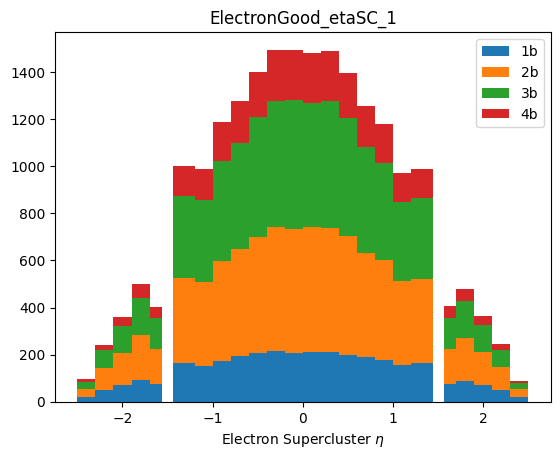

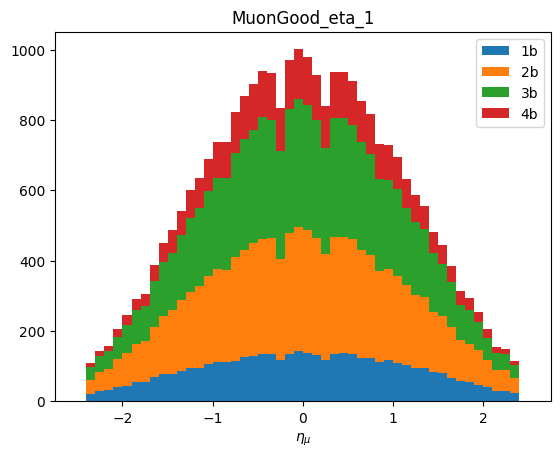

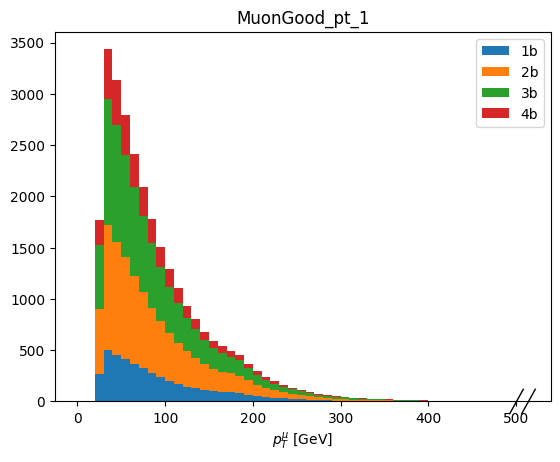

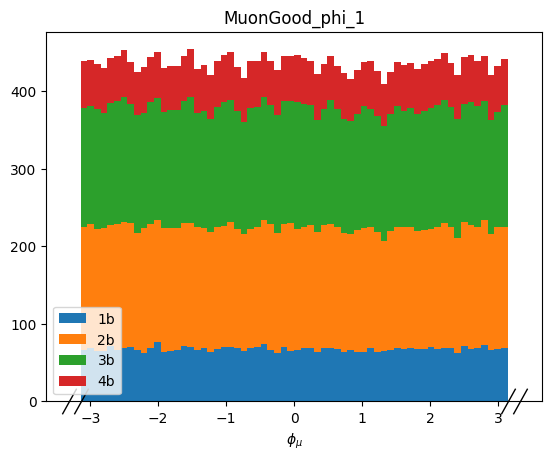

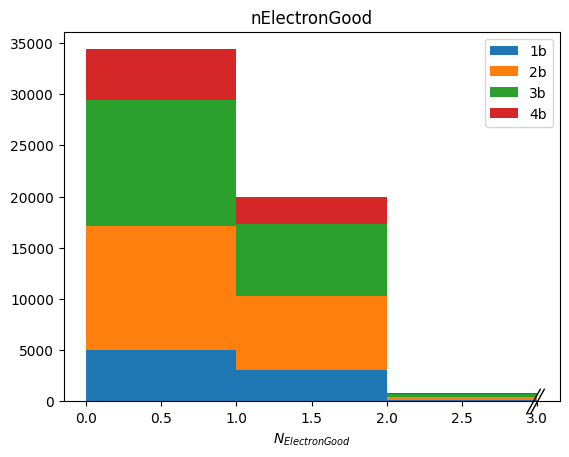

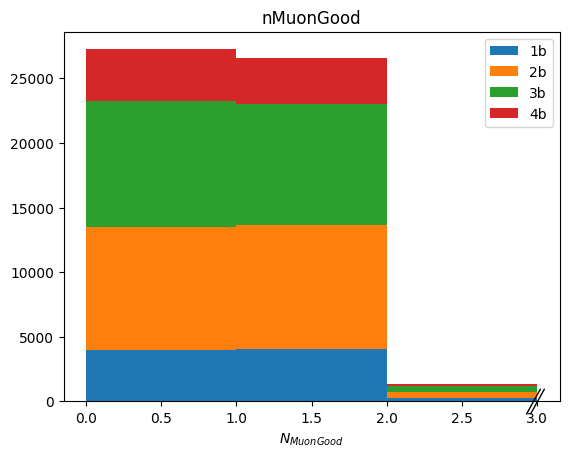

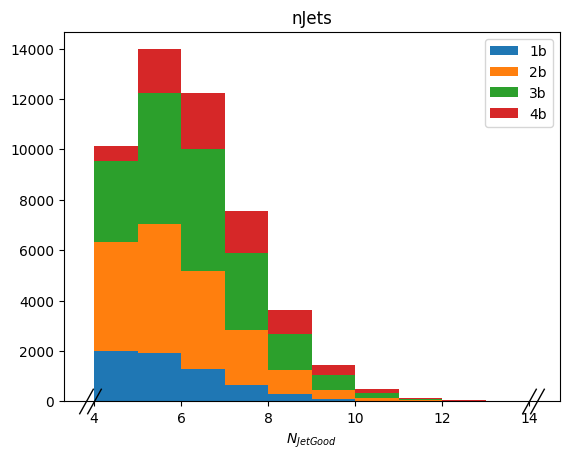

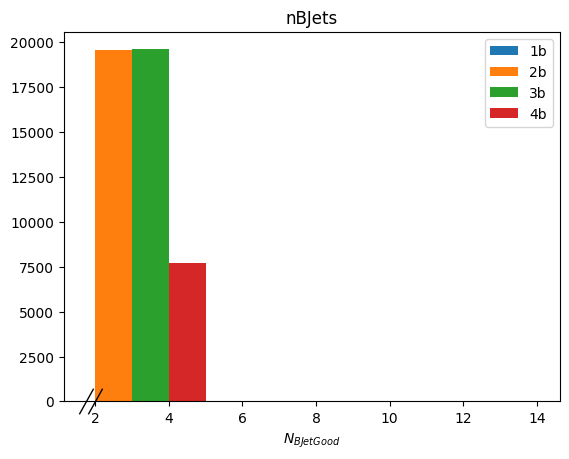

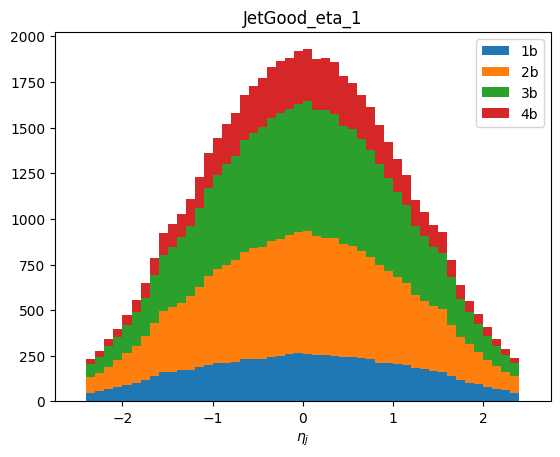

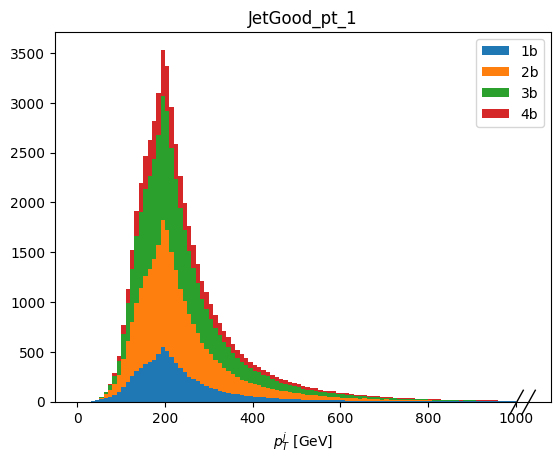

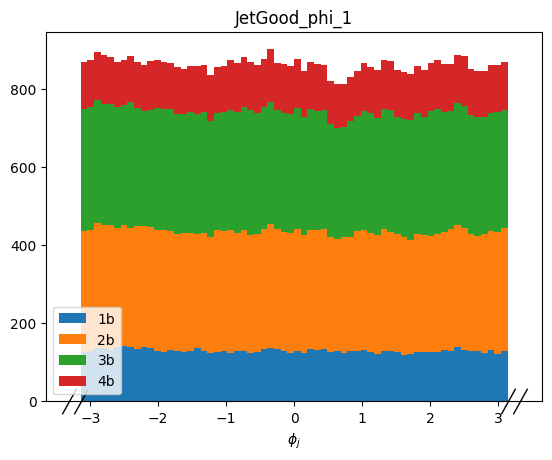

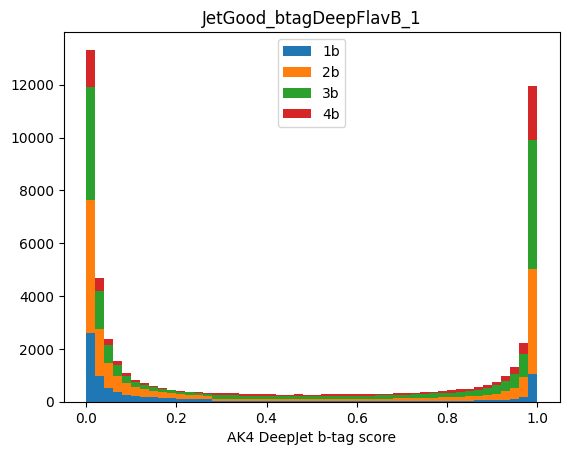

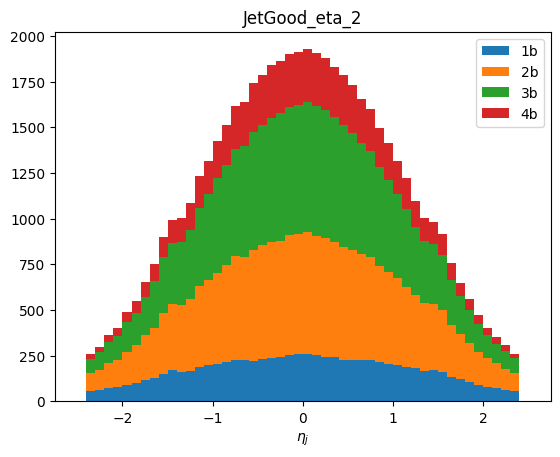

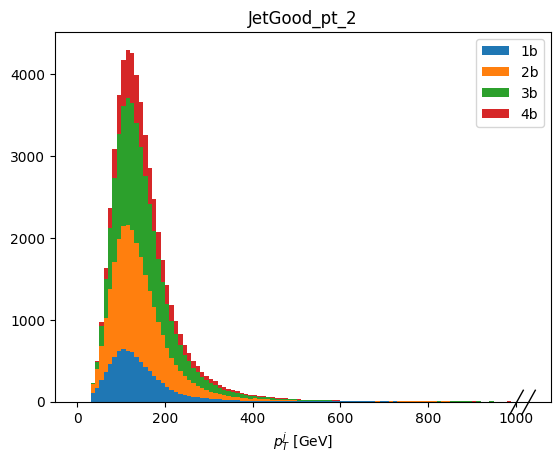

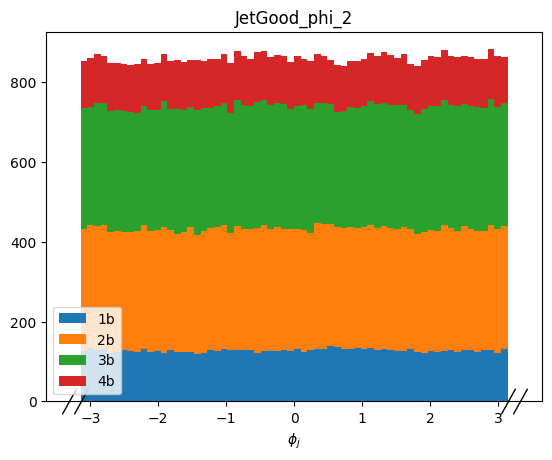

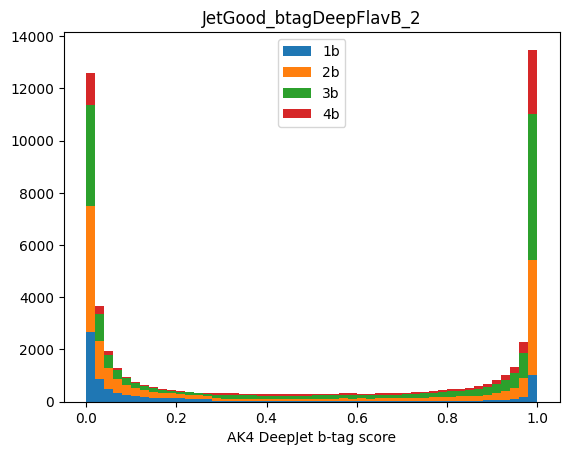

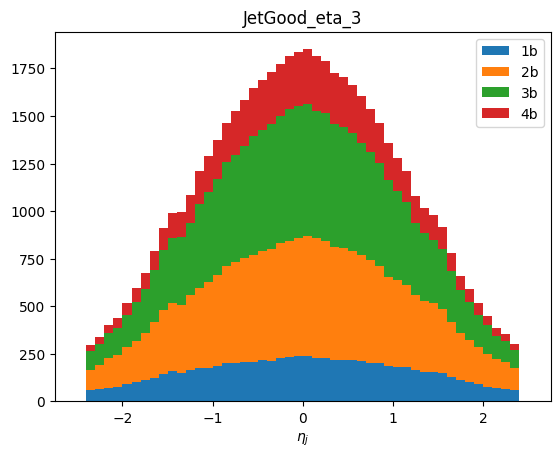

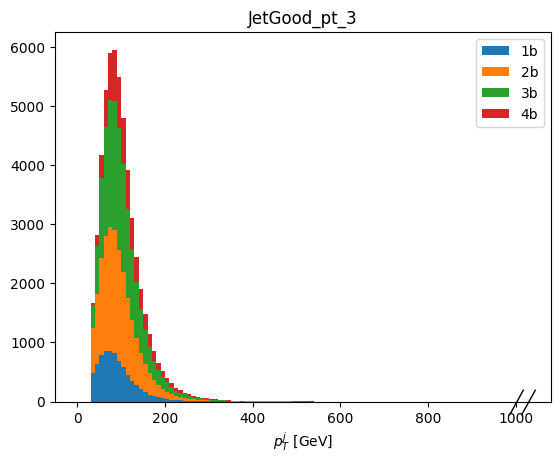

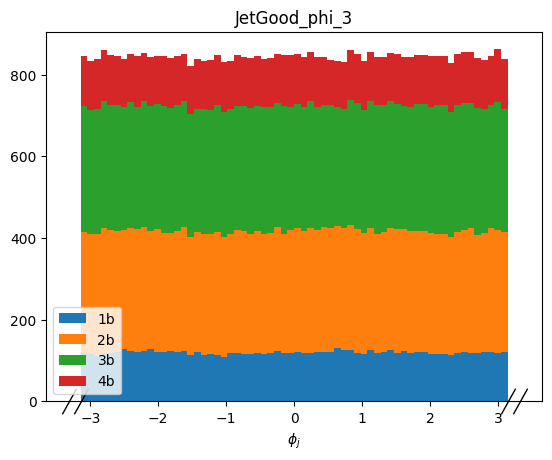

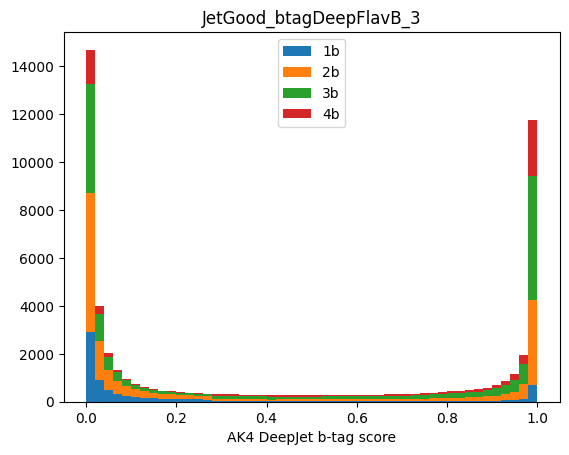

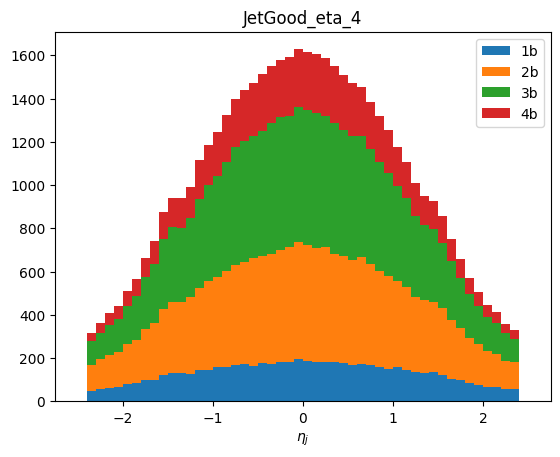

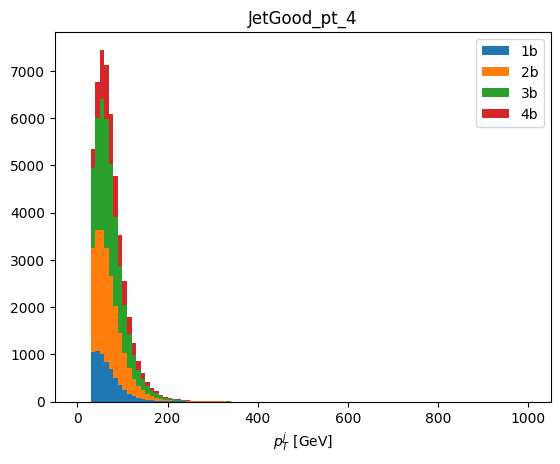

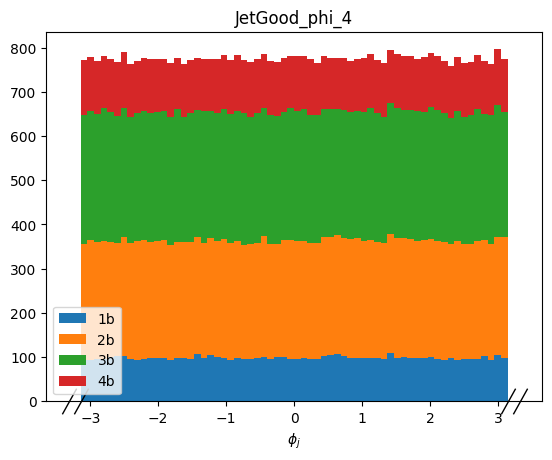

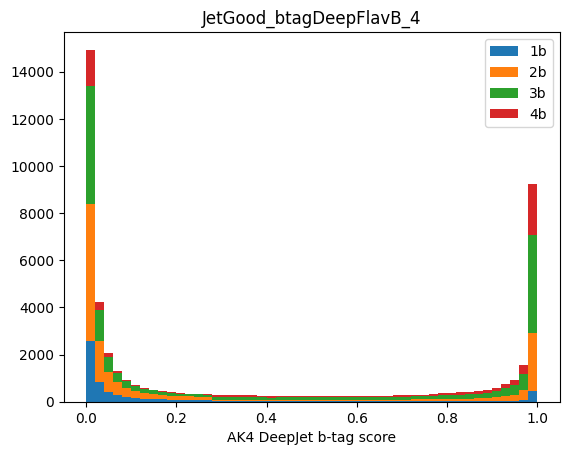

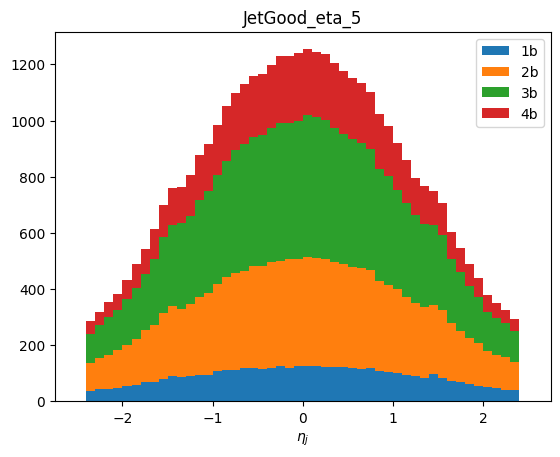

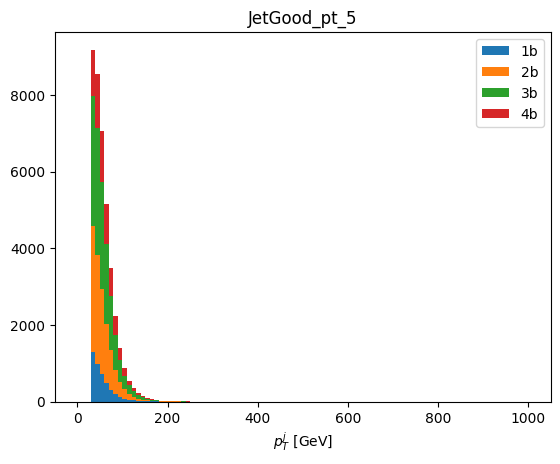

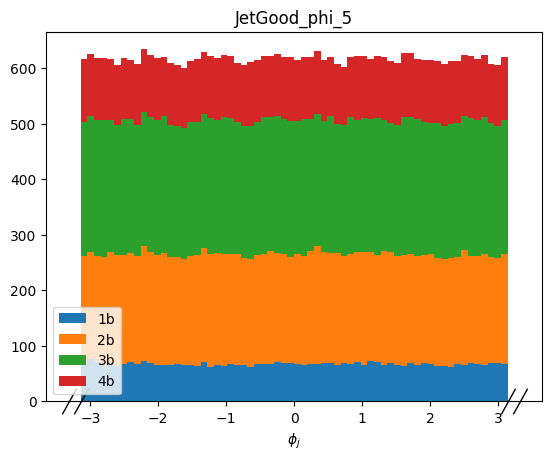

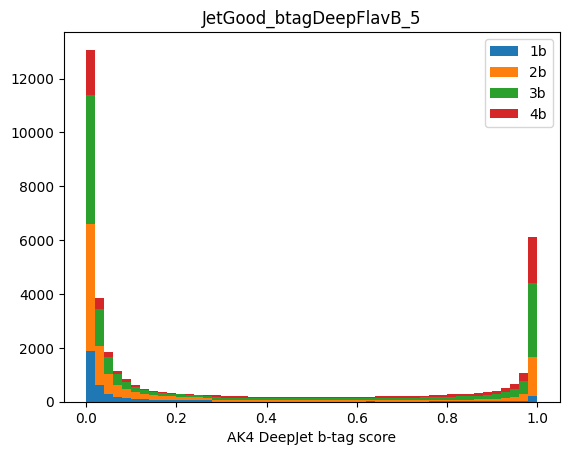

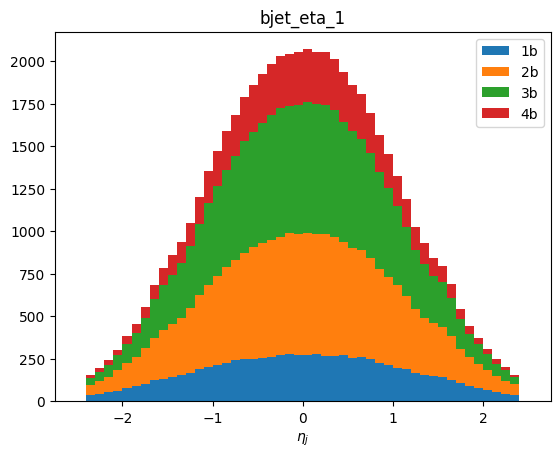

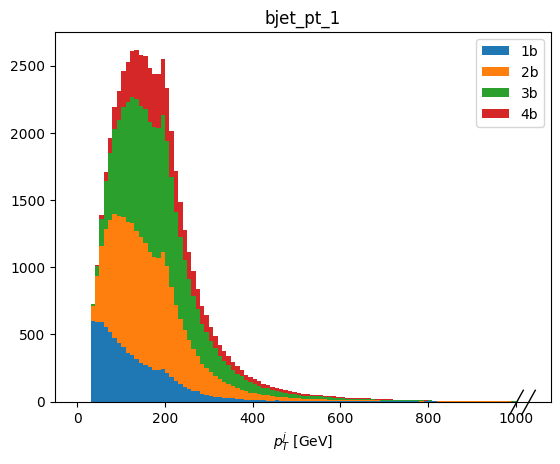

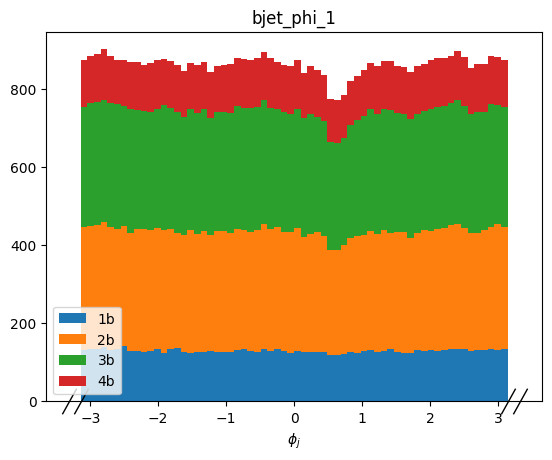

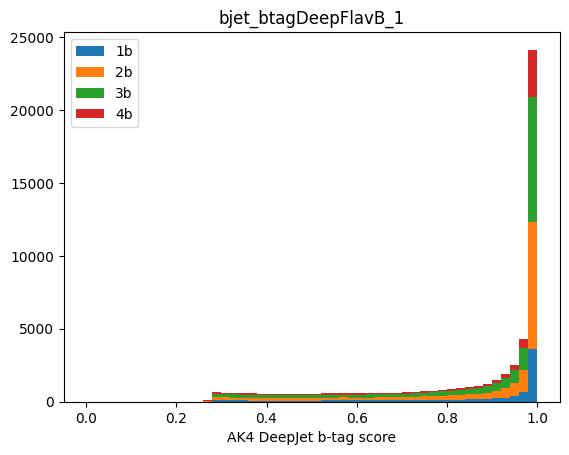

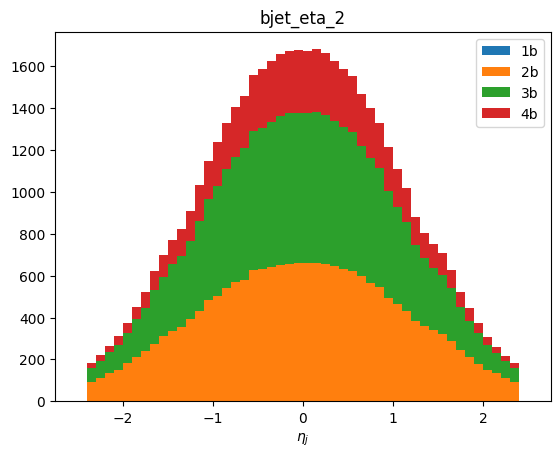

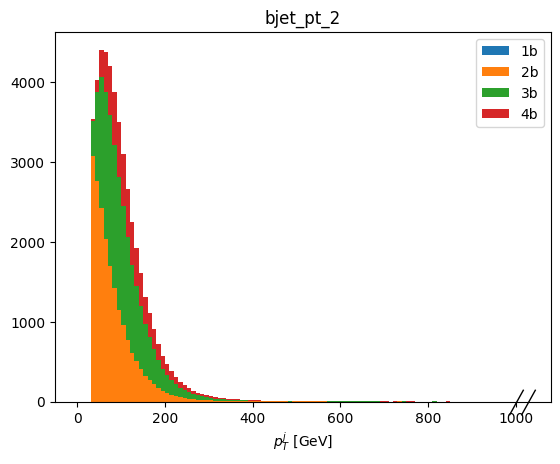

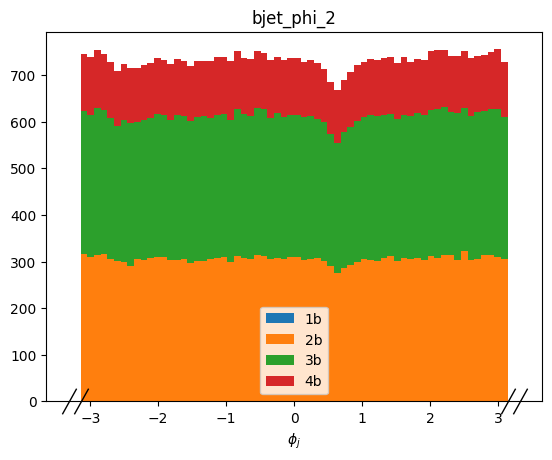

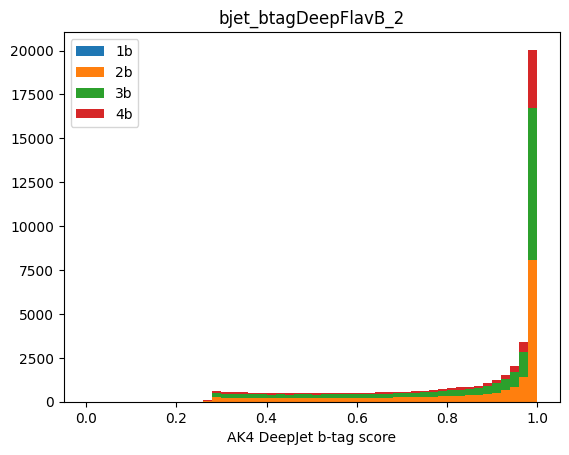

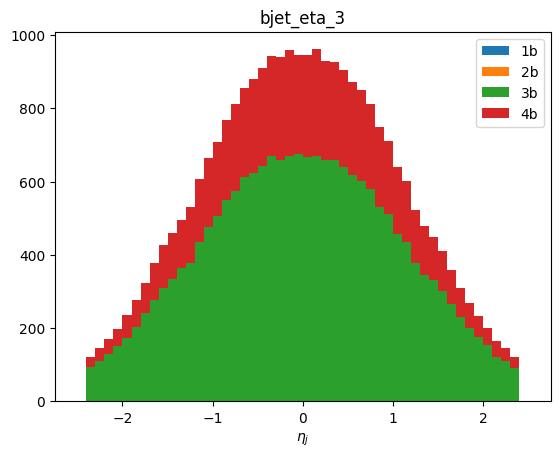

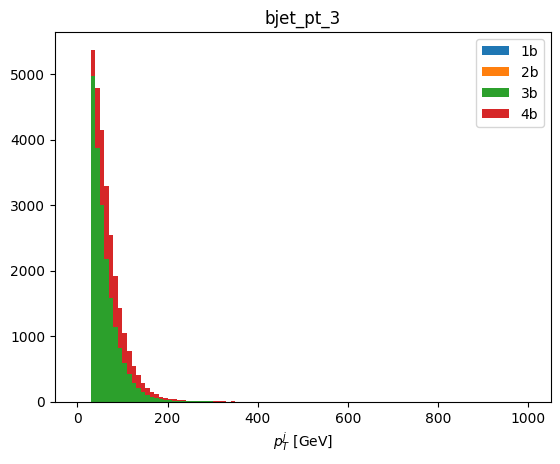

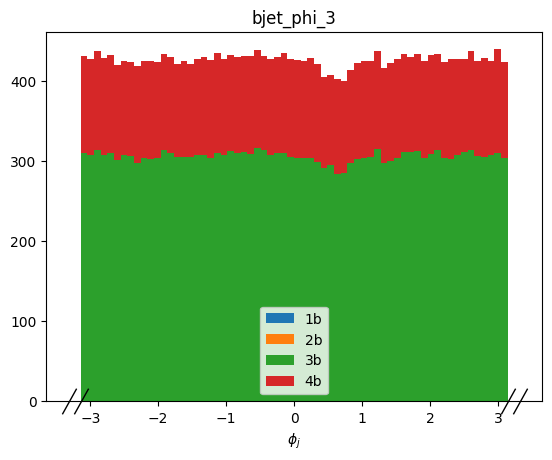

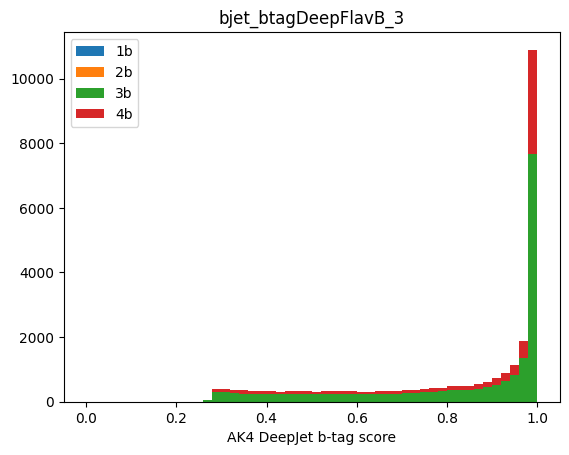

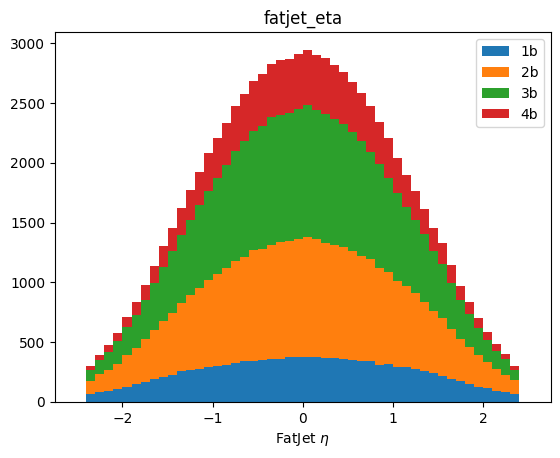

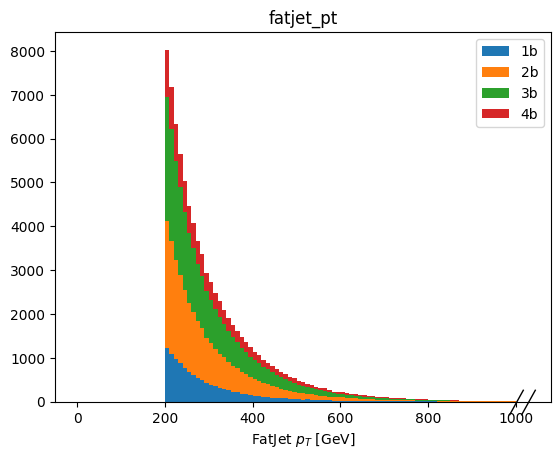

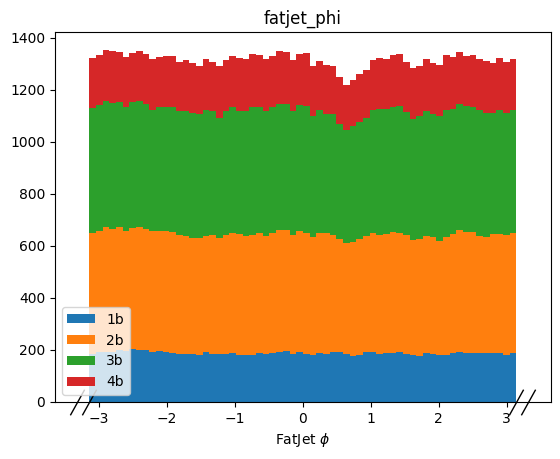

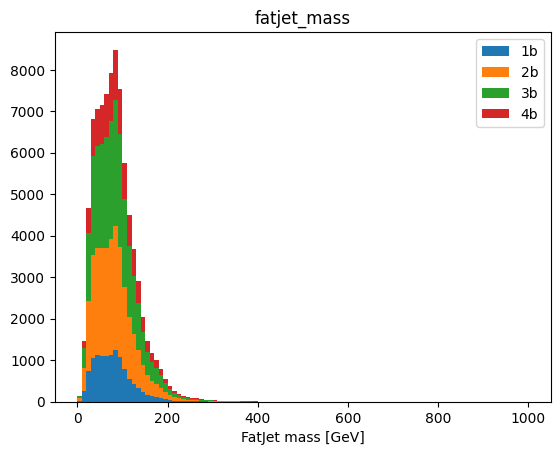

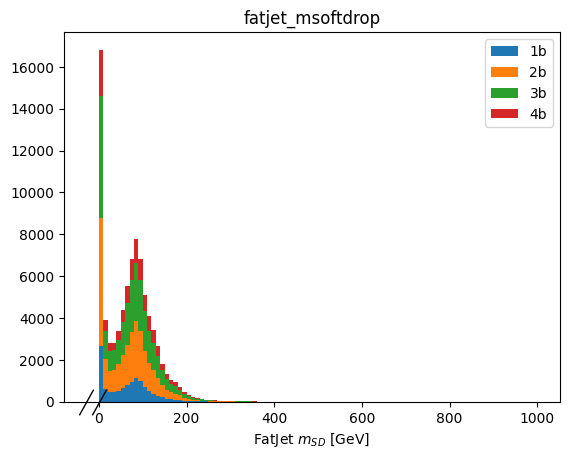

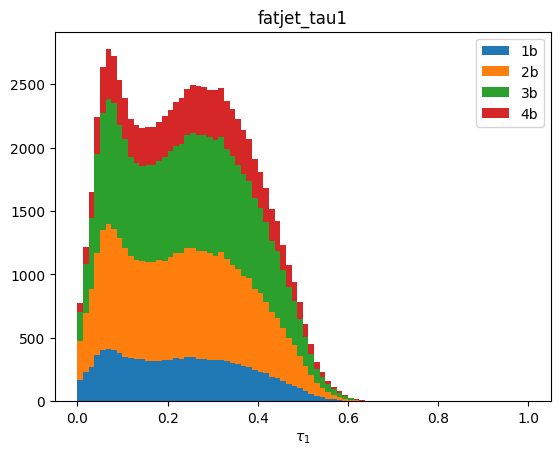

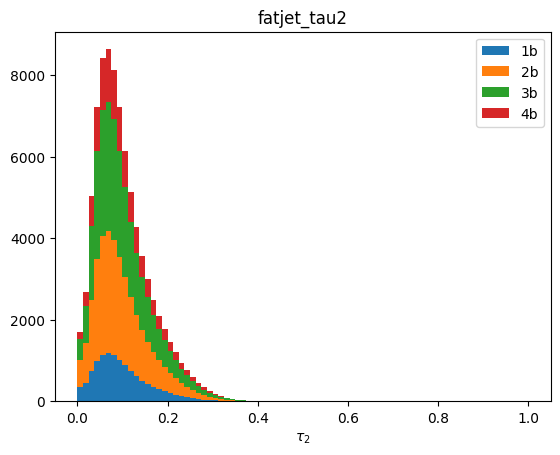

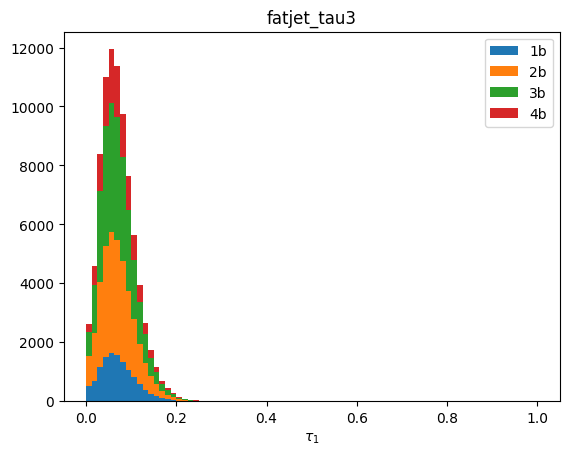

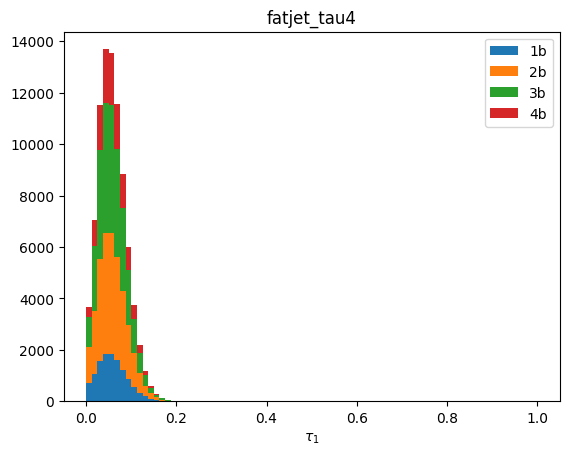

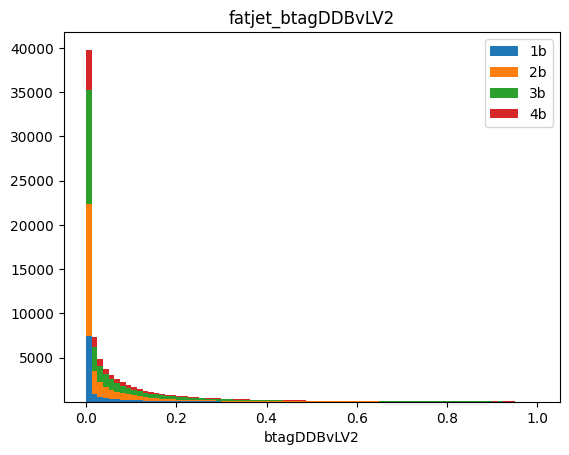

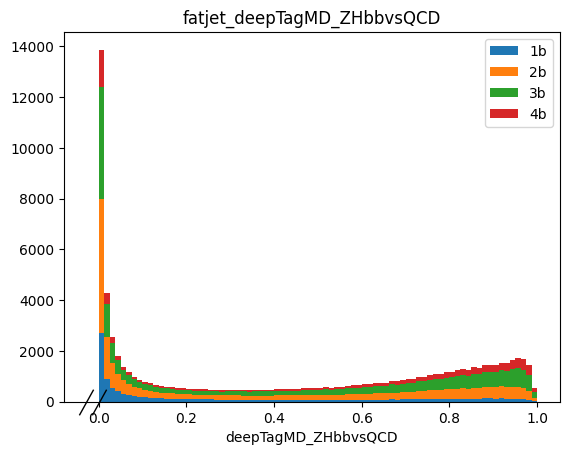

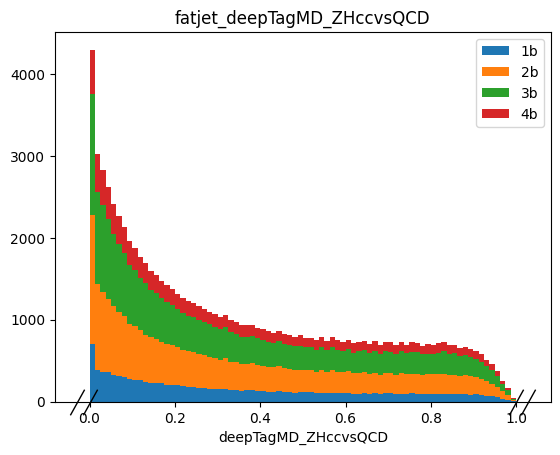

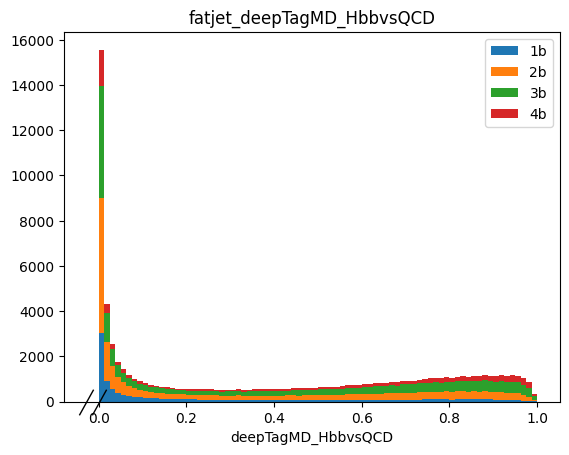

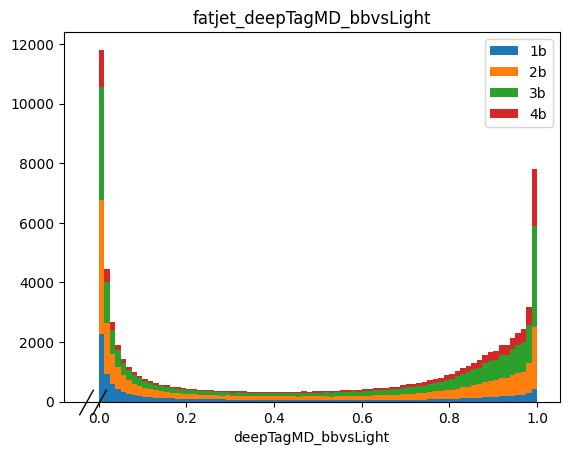

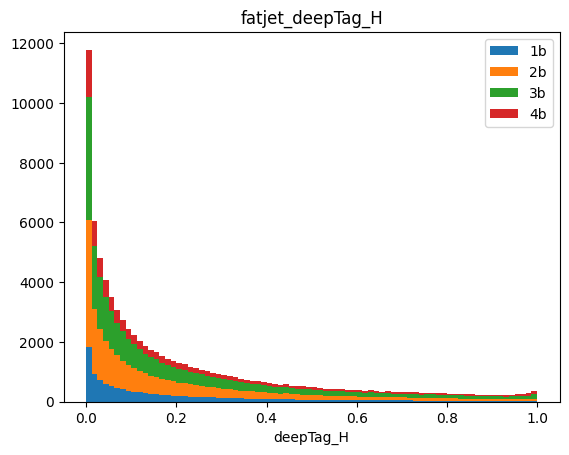

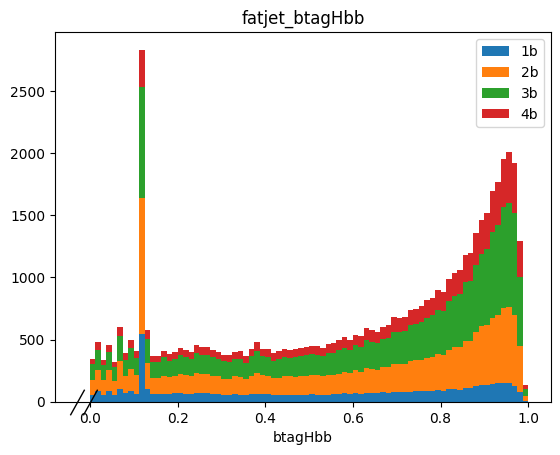

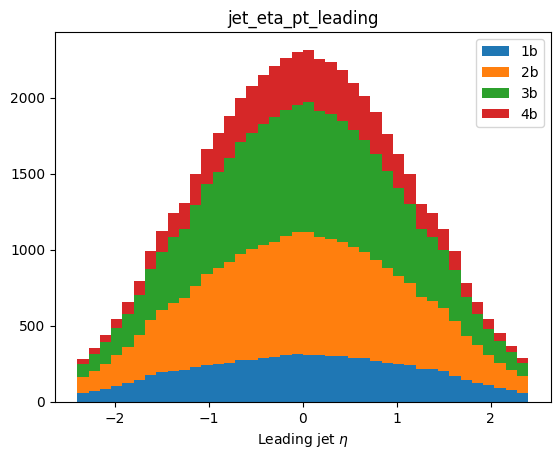

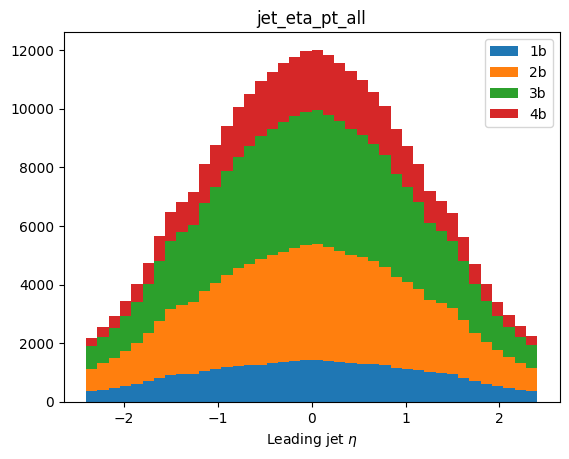

<Figure size 640x480 with 0 Axes>

In [43]:
for i, var_name in enumerate(o['variables'].keys()):
    varHist = o['variables'][var_name]['ttHTobb']
    h = varHist.stack("cat").project(varHist.axes[-1].name)[:-1].plot(stack=True,density=False,histtype="fill")
    plt.legend()
    plt.title(var_name)
    plt.savefig(f"hists/plot_{i}.png")
    plt.show()
    plt.clf()